# Project: Wrangle & Analyze Data (Twitter APIs)

## 1. Introduction

*Objective:*

Gathering Data for WeRateDogs account on twitter, wrangle & clean the data and then identify some insights

**. Data Gatheting**

    Loading up the 3 data sets from different sources

**. Assessing Data**

    Exploring the 3 datasets to identify quality issues and propose some wrangling to improve the usablity 
    of the datasets. 

**. Data Cleaning**

    After identifying quality issues in the data, i tried to fix those issues in each dataset separately,
    Then i'll merge the 3 datasets into 1 master dataset and save it in a CSV file
    
**. Data Analysis**    
    
    Key Questions:
    1. What are the most common dog names?
    2. What dog type has the Highest Average Rating?
    3. What is the percentage distrubution of ratings?
    4. Are tweets growing or decreasing by time?
    5. Is the retweeting & favourite activity growing or decreasing by time?


## 2. Data Gathering

In [68]:
## Libraries used
import tweepy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json

####  DATASET 1 - Reading Archive CSV

In [4]:
archive_data = pd.read_csv(r'/Users/ahmedzidane/Documents/Nanodegree/twitter/twitter-archive-enhanced.csv')
archive_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


####  DATASET 2 - Reading Image Prediction.TSV

In [5]:
images_data = pd.read_csv(r'/Users/ahmedzidane/Documents/Nanodegree/twitter/image-predictions-3.tsv', sep = '\t')
images_data.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


####  DATASET 3 - Reading Tweet JSON

In [6]:
tweets_data = []
## Reading Json File
tweet_file = open('/Users/ahmedzidane/Documents/Nanodegree/twitter/tweet-json', "r")

## Appending each tweet in json in list
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()   

## Converting list to pandas dataframe
tweet_info = pd.DataFrame()    

In [7]:
## Save only certain tweet elements in dataframe

tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [8]:
tweet_info.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## 3. Assessing Data

In [9]:
## Checking for null values and data types
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
## checking how many records with denominators not equal to 10
denominator_not_10 = archive_data[archive_data['rating_denominator'] != 10]
denominator_not_10.shape[0]



23

In [11]:
## Checking the dogs names, Many Names are "None"
archive_data.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Bailey            7
Daisy             7
Toby              7
an                7
Leo               6
Oscar             6
Stanley           6
Rusty             6
Bella             6
Jax               6
Dave              6
Jack              6
Milo              6
Koda              6
Scout             6
Larry             5
               ... 
Henry             1
Frönq             1
Laela             1
Pawnd             1
Shooter           1
Pete              1
Gunner            1
Joey              1
Alexanderson      1
Grey              1
Alejandro         1
Iroh              1
Ronnie            1
Snoopy            1
Willow            1
Yukon             1
Hanz              1
Rambo             1
Karma             1


In [12]:
## doggo and other type columns has None value instead of NaN
archive_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
## Checking if images dataset has any null values
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
## checking if names are real dog names
images_data.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [15]:
## Checking if any of the prediction confidence (P1) have outliers (outside 0 and 1 values)
images_data.p1_conf.plot(kind='box')


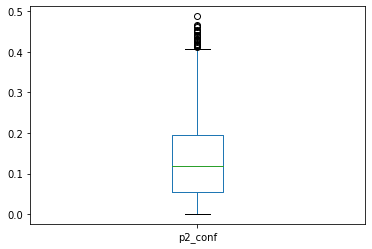

In [16]:
## Checking if any of the prediction confidence (P2) have outliers (outside 0 and 1 values)
images_data.p2_conf.plot(kind='box')


In [17]:
## Checking if tweet_info dataset have any nulls
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Quality Issues:
  **Archive Dataset**
    1. Some datatypes are wrong (timestamp,retweeted_status_timestamp)
    2. Some records have denominator not equal to 10
    3. 745 records have dog name = None
    4. Some records are retweets and replies
    5. There are some outliers in rating numerator (Very high numbers)
    6. Extended URL have some null values
    7. Doggo, Puppo, Pupper and Floofer columns have None values, should be Nan
    
  **Images Dataset**
    8. P1, P2, P3 has no real dog names sometimes
    9. The dataset doesn't have records for all 2354 ids. it only have 2075 ids
    
### Tideness:    
    . All three dataset should be joined together
    . Doggo, Puppo, Pupper, Floofer should be merged together in one column stating the type
    . All retweets and replies should be deleted

## 4. Data Cleaning:

#### Copying Dataframes

In [19]:
archive_clean = archive_data.copy()
images_clean = images_data.copy()
tweet_info_clean = tweet_info.copy()

#### Correcting Data types (Timestamps)

In [20]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes

#### Remove Retweets 

In [21]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]


#### Remove Replies 

In [22]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

## Checking the in_reply_to_status_id & retweeted_status_id are null
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: dateti

#### Merging 4 Dog types Columns into one Columns

In [23]:
# Merging all the type columns into one column for tideness
archive_clean['dog_type'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Dropping the old columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean = archive_clean.drop(columns, axis=1)



In [174]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### Remove Empty columns after removing retweets & Replies

In [25]:
# Not needed anymore
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)


In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              353 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


#### Removing 23 records with wrong Denominator ( != 10)

In [27]:
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]


In [28]:
## Checking if we still have any denominators not equal 10, the output should be 0
denominator_not_10 = archive_clean[archive_clean['rating_denominator'] != 10]
denominator_not_10.shape[0]

0

#### Dealing with Outlier Numerators: 
     3 Types:
     . Normal (between 10 and 15)
     . Low (Less than 10)
     . Outlier (More than 15)

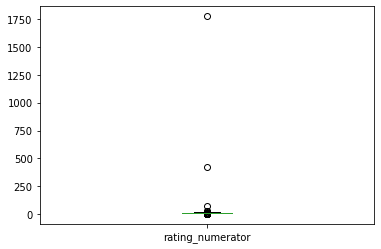

In [29]:
## We have outlier values as shown in the boxplot
archive_clean.rating_numerator.plot(kind='box')

In [30]:
## getting an idea of what values we have in the numerator

## we can categorize our values into 3 types
# Normal ( Between 10 and 15)
# Low (Less than 10)
# Outlier (more than 15)
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [31]:
## I have no problem working with the LOW numerators only if it shows real data
# so i will take a sample and match it with the text to see if it's real or error data

# Maximzing column length to view text 
pd.set_option('display.max_colwidth', -1)

# checking a sample where numerator is 9
archive_clean[archive_clean['rating_numerator'] == 9].head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
845,766423258543644672,2016-08-18 23:55:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,"https://twitter.com/dog_rates/status/766423258543644672/photo/1,https://twitter.com/dog_rates/status/766423258543644672/photo/1",9,10,Shadoe,NaN
906,758041019896193024,2016-07-26 20:47:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv,https://twitter.com/dog_rates/status/758041019896193024/photo/1,9,10,None,NaN
946,752568224206688256,2016-07-11 18:20:21+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,https://vine.co/v/5W0bdhEUUVT,9,10,None,doggo
966,750383411068534784,2016-07-05 17:38:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,https://twitter.com/dog_rates/status/750383411068534784/photo/1,9,10,Zoe,pupper
1025,746369468511756288,2016-06-24 15:48:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,NaN
1031,745422732645535745,2016-06-22 01:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,https://twitter.com/dog_rates/status/745422732645535745/photo/1,9,10,very,NaN
1035,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo https://t.co/2FPb45NXrK,"https://twitter.com/dog_rates/status/744995568523612160/photo/1,https://twitter.com/dog_rates/status/744995568523612160/photo/1",9,10,Abby,puppo
1060,741438259667034112,2016-06-11 01:13:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He's still figuring out couches. 9/10 keep your head up pup https://t.co/pXU77HPbJ5,https://twitter.com/dog_rates/status/741438259667034112/photo/1,9,10,Tucker,NaN
1065,740711788199743490,2016-06-09 01:07:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,https://twitter.com/dog_rates/status/740711788199743490/photo/1,9,10,None,NaN
1070,740359016048689152,2016-06-08 01:45:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chase. He's in a predicament. 9/10 help is on the way buddy https://t.co/0HmBk5sSbW,https://twitter.com/dog_rates/status/740359016048689152/photo/1,9,10,Chase,NaN


In [32]:
#### It seems that Low Ratings (below 10) are not really outliers, they are real low rating
# so i will only remove the Outlier Values (Higher than 15)

archive_clean = archive_clean[(archive_clean['rating_numerator'] <= 15) & (archive_clean['rating_numerator'] != 0)]

archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8     98 
7     51 
14    38 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
Name: rating_numerator, dtype: int64

#### Changing Dog Name = None to Nan

In [33]:
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2074 non-null int64
timestamp             2074 non-null datetime64[ns, UTC]
source                2074 non-null object
text                  2074 non-null object
expanded_urls         2071 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  1485 non-null object
dog_type              346 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.0+ KB


#### Merging The 3 Datasets into 1 Master

In [59]:
# Merging Archive with Images Dataset 
# using Inner join to remove Tweets without Image prediction Data
df_archive_image = pd.merge(archive_clean, images_clean, how='inner', on=['tweet_id'])

df_archive_image.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 20 columns):
tweet_id              1948 non-null int64
timestamp             1948 non-null datetime64[ns, UTC]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1438 non-null object
dog_type              315 non-null object
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
dtypes: bool(3), datetime64[

In [61]:
## Renaming id to tweet_id in tweet_info for the merge
tweet_info_clean.rename(columns={'id':'tweet_id'}, inplace=True)

## Merging Both Archive & Image dataset with Tweet_Info
twitter_archive_master = pd.merge(df_archive_image, tweet_info_clean, how='left', on=['tweet_id'])


In [62]:
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 22 columns):
tweet_id              1948 non-null int64
timestamp             1948 non-null datetime64[ns, UTC]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1438 non-null object
dog_type              315 non-null object
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
retweet_count         1948 n

In [71]:
## making an extra column for rating (rating_numerator/rating_denominator)
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator'] 

twitter_archive_master.head(5)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,1.2


In [72]:
#### Writing the master file to CSV
twitter_archive_master.to_csv(r'/Users/ahmedzidane/Documents/Nanodegree/twitter/twitter_archive_master.csv')


## 5. Data Analysis

### Research Question 1: What are the most common dog names?


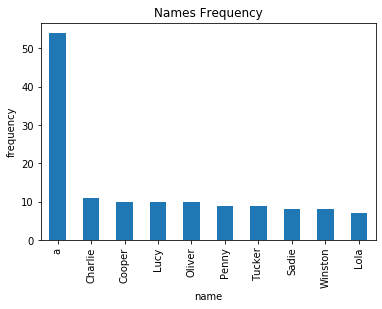

In [69]:
## taking top 10 names
top_names = twitter_archive_master.name.value_counts().nlargest(10)

## plotting the frequency of those names

top_names.plot(kind = 'bar')
plt.xlabel('name')
plt.ylabel('frequency')
plt.title('Names Frequency')
plt.show()

## Many names are "A" which seems like a naming issue but we will leave it for now and ignore it as a first place

### Research Question 2: What dog type has the Highest Average Rating?


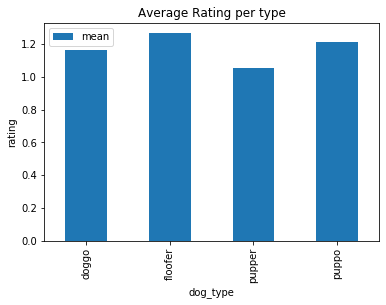

In [92]:
## grouping by dog_type to get averages
group_by_type =twitter_archive_master.groupby('dog_type').agg(['mean']).reset_index()

group_by_type.plot(x='dog_type' , y='rating' , kind='bar')

plt.xlabel('dog_type')
plt.ylabel('rating')
plt.title('Average Rating per type')
plt.show()

## Floofer seems to get more rating on average


### Research Question 3: What is the distrubution of ratings


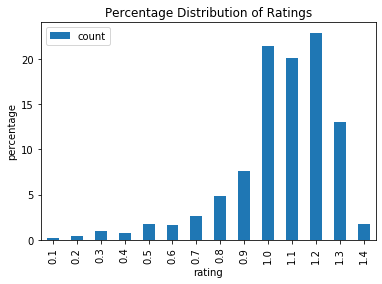

In [155]:
## Counting rows in each rating bucket and calculating percentage out of total
group_by_rating =twitter_archive_master.groupby('rating').agg(['count']).apply(lambda x:100 * x / float(x.sum()))
group_by_rating.sort_values('rating')


group_by_rating['tweet_id'].plot(kind='bar')
plt.xlabel('rating')
plt.ylabel('percentage')
plt.title('Percentage Distribution of Ratings')
plt.show()

## most of the time the rating is between 10 and 13
## 7% of the times the rating id 9

### Research Question 4: Are tweets growing or decreasing by time?


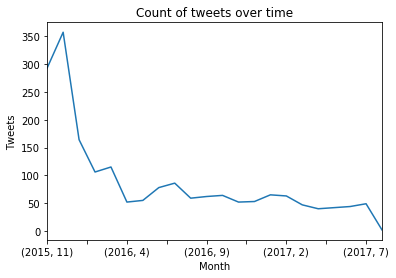

In [159]:
# counting tweets in each month/year
group_by_time = twitter_archive_master.tweet_id.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).count()

group_by_time.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.title('Count of tweets over time')
plt.show()

## we will actually notice that tweeting activity is decreasing by time

### Research Question 5: Is the retweeting & favorite activity growing or decreasing by time?


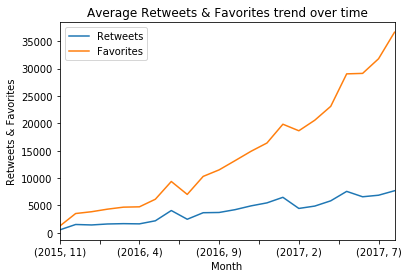

In [169]:
## grouping by time to calculate mean
group_by_time = twitter_archive_master.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).mean()

## plotting both retweets and favorites
group_by_time['retweet_count'].plot(kind='line')
group_by_time['favorite_count'].plot(kind='line')

plt.xlabel('Month')
plt.ylabel('Retweets & Favorites')
plt.title('Average Retweets & Favorites trend over time')
plt.legend(('Retweets', 'Favorites'))
plt.show()

## Retweet & Favorite rate is growing by time, 
## which idicates that even though the account is posting less by 2017, it's still growing in popularity 

